#         **Social Media and Mental Health in Canada**: 
# Analyzing data on social media and its impact on the mental health of Canadian teenagers

###  Introduction

As social media platforms become more integrated into daily life, it is increasingly important to understand their impact on mental health. This project aims to explore the effects of social media usage on the mental well-being of adolescents in Canada. By analyzing and web scraping data from four articles published between 2018 and 2024, this project seeks to understand the mental well-being of teenagers in Canada. 

This project will focus on the following questions: 

Has the increase in online presence and consumption directly impacted the adolescent population, and what are those effects? Additionally, how do these effects directly influence the mental well-being of adolescents, and to what extent?

In [10]:
# Standard imports
import numpy as np
import pandas as pd

# For web scraping
import requests
import urllib.request
from bs4 import BeautifulSoup
import re

# For graphs and visuals
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import plotly.graph_objects as go

## Article: Digital well-being: the relationship between technology use, mental health and interpersonal relationships by Gabrielle Asselin, Howard Bilodeau and Aisha Khalid
Release date: January 16th, 2024

### Analysis
The following shows my method to scrape the date from Statistics Canada. It shows the online activity and the frequency in percentage. 

In [11]:
url = 'https://www150.statcan.gc.ca/n1/pub/22-20-0001/222000012024001-eng.htm'
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
tables1 = soup.find_all('table')

table_chart = tables1[0]

df = pd.read_html(str(table_chart))[0]

df = df.iloc[:-1]

df

C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\3892788079.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_chart))[0]


Online activity 20 hours or more per week  \
             Online activity                   Percent   
             Online activity                   Percent   
0       General Internet use                        44   
1  Watching streamed content                        40   
2         Online video games                        35   

                               10 to less than 20 hours per week  \
  95 % confidence interval                               Percent   
                      from  to                           Percent   
0                       42  46                                49   
1                       38  43                                46   
2                       31  40                                43   

                              Less than 10 hours per week  \
  95% confidence interval                         Percent   
                     from  to                     Percent   
0                      48  51                          56   
1                      45  48                          56   
2                      39  46                          47   

                               
  95% confidence interval      
                     from  to  
0                      54  57  
1                      54  57  
2                      45  50

Here I isolate the data that matters. I want the percentage for each category and not the confidence interval.

In [12]:
col1 = df.iloc[: , 1].tolist()

col2 = df.iloc[: , 4].tolist()

col3 = df.iloc[: , 7].tolist()

data1 = [col1, col2, col3]

int_data1 = [[int(num) for num in row] for row in data1]

print("Online Activity:")
for row in int_data1:
    print(row)

Online Activity:
[44, 40, 35]
[49, 46, 43]
[56, 56, 47]


To visualize the data, I inserted the data into a graph. The error about this step it takes longer to write the code. The following will show a more simplified model. 

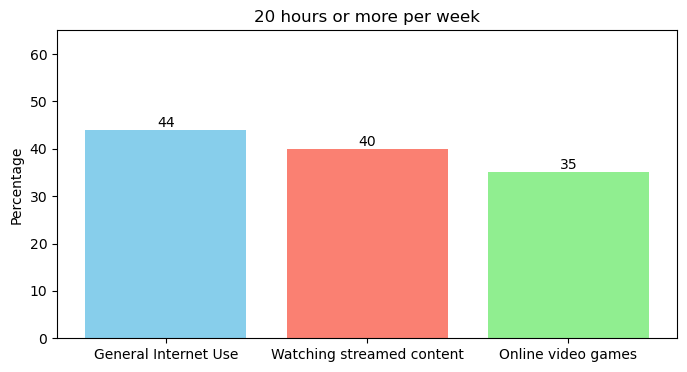

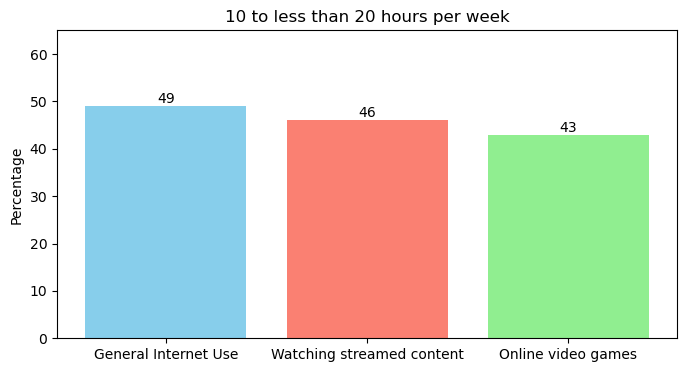

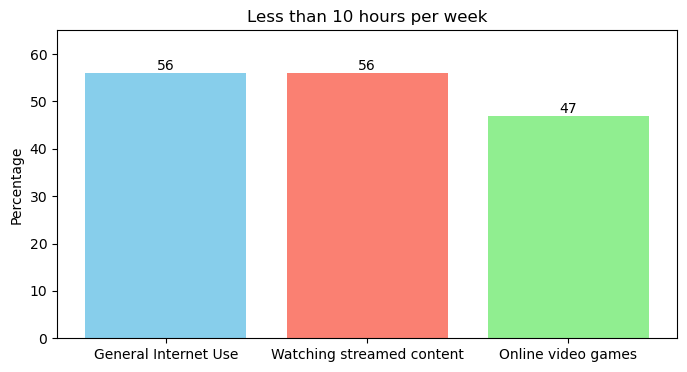

In [13]:
# Chart for 20 hours or more per week
a_value = 44
b_value = 40
c_value = 35

plt.figure(figsize=(8, 4))

bars = plt.bar(['General Internet Use', 'Watching streamed content', 'Online video games'], [a_value, b_value, c_value], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Percentage')
plt.title('20 hours or more per week')
plt.ylim(0, 65)  

for bar, value in zip(bars, [a_value, b_value, c_value]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom')

# Chart for 10 to less than 20 hours per week
a_value_col2 = 49
b_value_col2 = 46
c_value_col2 = 43

plt.figure(figsize=(8, 4)) 

bars = plt.bar(['General Internet Use', 'Watching streamed content', 'Online video games'], [a_value_col2, b_value_col2, c_value_col2], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Percentage')
plt.title('10 to less than 20 hours per week')
plt.ylim(0, 65)  

for bar, value in zip(bars, [a_value_col2, b_value_col2, c_value_col2]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom')

# Chart for less than 10 hours per week
a_value_col3 = 56
b_value_col3 = 56
c_value_col3 = 47

plt.figure(figsize=(8, 4)) 

bars = plt.bar(['General Internet Use', 'Watching streamed content', 'Online video games'], [a_value_col3, b_value_col3, c_value_col3], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Percentage')
plt.title('Less than 10 hours per week')
plt.ylim(0, 65)  

for bar, value in zip(bars, [a_value_col3, b_value_col3, c_value_col3]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom')

plt.show()

In the following, a more detailed and simpler method is presented to display all the data from the three categories in a single graph.

The data was collected from a 2022 survey. The three distinct categories depict the frequency of online activity, and the bars illustrate the type of online activity. The survey data indicates that young Canadians who spend less time online tend to have better mental well-being.  

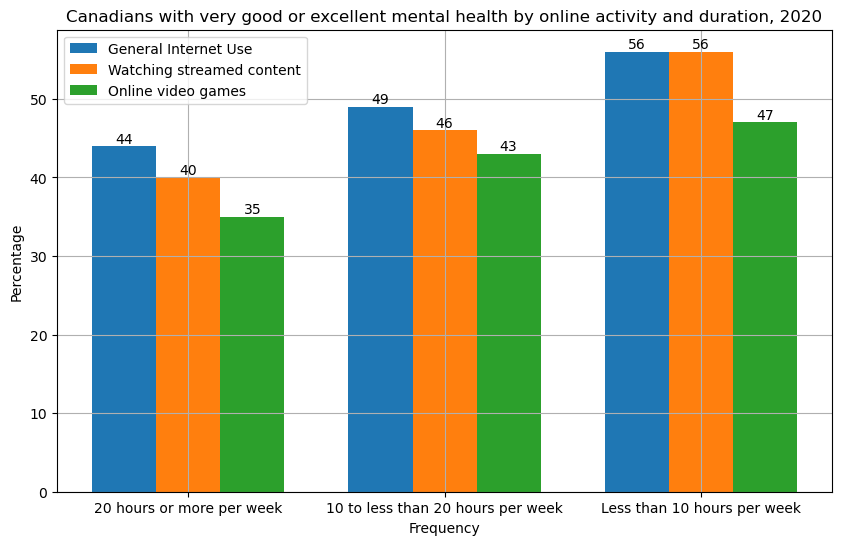

In [14]:

categories = ['20 hours or more per week', '10 to less than 20 hours per week', 'Less than 10 hours per week']

data = np.array(int_data1)

data = data.T

num_categories = len(categories)

num_groups = len(data)

bar_width = 0.25

x = np.arange(num_categories)

plt.figure(figsize=(10, 6))

for i in range(num_groups):
    bars = plt.bar(x + i * bar_width, data[i], width=bar_width, label=f'col{i+1}')
    for bar, value in zip(bars, data[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom')

plt.xlabel('Frequency')
plt.ylabel('Percentage')
plt.title('Canadians with very good or excellent mental health by online activity and duration, 2020')
plt.xticks(x + (num_groups - 1) * bar_width / 2, categories)
plt.legend(['General Internet Use', 'Watching streamed content', 'Online video games'])
plt.grid(True)

plt.show()

Here, I wanted to investigate the relationship between smartphone usage frequency and the mental health of survey participants. I extracted the data from Statistics Canada using web scraping.

In [15]:
url = 'https://www150.statcan.gc.ca/n1/pub/22-20-0001/222000012024001-eng.htm'
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
tables2 = soup.find_all('table')

table_chart2 = tables2[2]

df1 = pd.read_html(str(table_chart2))[0]

df1 = df1.iloc[:-1]

df1

C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\2443130937.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(table_chart2))[0]


Frequency of smartphone use Very good or excellent  \
   Frequency of smartphone use                Percent   
   Frequency of smartphone use                Percent   
0        Once per hour or more                     50   
1  A few times per day or less                     58   

                                  Good                              \
  95 % confidence interval     Percent 95% confidence interval       
                      from  to Percent                    from  to   
0                       49  52      31                      30  33   
1                       56  60      30                      28  32   

  Fair or poor                              
       Percent 95% confidence interval      
       Percent                    from  to  
0           19                      18  20  
1           12                      10  14

Here I isolated the data that I wanted to focus on, which is the percentage of the reported mental health level of those who took the survey.

In [16]:

co1 = df1.iloc[: , 1].tolist()

co2 = df1.iloc[: , 4].tolist()

co3 = df1.iloc[: , 7].tolist()

data2 = [co1, co2, co3]

int_data2 = [[int(num) for num in row] for row in data2]

print("Frequency of smartphone use:")
for row in int_data2:
    print(row)

Frequency of smartphone use:
[50, 58]
[31, 30]
[19, 12]


I created a single graph to facilitate the comparative analysis of the data. 

The results indicate that individuals who spend less time using their smartphones generally exhibit very good or good mental health. 

On the other hand, those who spend more time on their phones tend to have a fair or poor level of mental health. Specifically, 19% of those who look at their smartphones once per hour or more fall into the fair or poor category, compared to only 12% of those who only check their phones a few times per day.

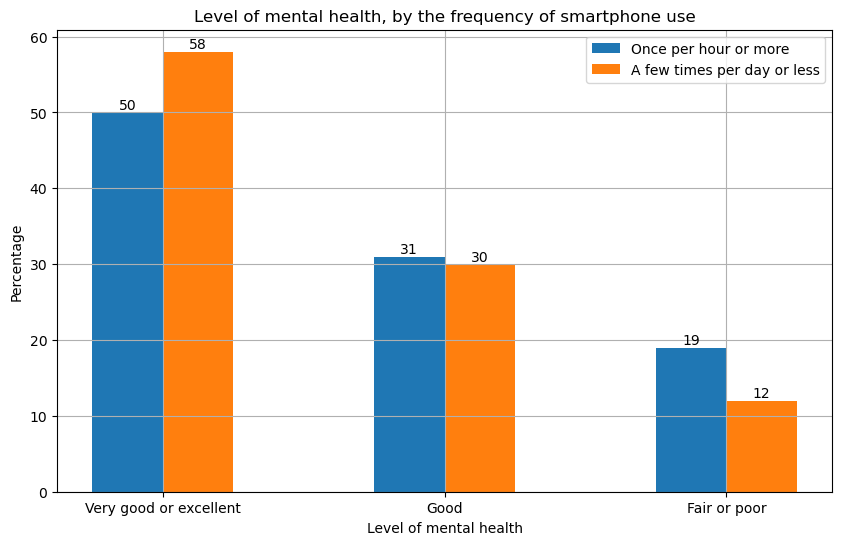

In [17]:

categories = ['Very good or excellent', 'Good', 'Fair or poor']

data = np.array(int_data2)

data = data.T

num_categories = len(categories)

num_groups = len(data)

bar_width = 0.25

x = np.arange(num_categories)

plt.figure(figsize=(10, 6))

for i in range(num_groups):
    bars = plt.bar(x + i * bar_width, data[i], width=bar_width, label=f'col{i+1}')
    for bar, value in zip(bars, data[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value, ha='center', va='bottom')

plt.xlabel('Level of mental health')
plt.ylabel('Percentage')
plt.title('Level of mental health, by the frequency of smartphone use')
plt.xticks(x + (num_groups - 1) * bar_width / 2, categories)
plt.legend(['Once per hour or more', 'A few times per day or less'])
plt.grid(True)

plt.show()

# Article: Canadians’ assessments of social media in their lives by Christoph Schimmele, Jonathan Fonberg and Grant Schellenberg

Release date: March 24th, 2021

### Analysis

I have collected data from the mentioned article through web scraping. My aim is to conduct a comparative analysis of social media usage between males and females. I am not interested in the average number of social media apps or the average number of activities. My focus is on the specific activities related to social media.


In [18]:
url = 'https://www150.statcan.gc.ca/n1/pub/36-28-0001/2021003/article/00004-eng.htm'
r = requests.get(url)

soup = BeautifulSoup(r.content, "html.parser")
tables = soup.find_all('table')

table_chart = tables[0]

df = pd.read_html(str(table_chart))[0]
df = df.fillna('')

df = df.iloc[:-1]

df

C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\582203091.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_chart))[0]


,0,1,2,3,4,5
0,,Percent of people who used Internet in the pre...,Percent of people who regularly use social med...,Percent of people who use three or more social...,Average number of social media apps or website...,Average number of activities done on social me...
1,,percent,percent,percent,number,number
2,Total,91.3,77.6,25.2,1.9,3.3
3,Male,92.2,73.3,25.3,1.9,3.1
4,Female,90.5,81.9,25.1,1.9,3.4
5,Age group (years),,,,,
6,15 to 19,99.6,92.2,53.3,2.6,3.5
7,20 to 24,97.7,95.9,50.7,2.5,3.4
8,25 to 29,99.1,92.8,35.8,2.2,3.6
9,30 to 34,98.7,91.1,24.6,1.9,3.6


I isolated the data for males and females so it would be easier to make a graph. 

In [19]:
soup = BeautifulSoup(r.content, "html.parser")
tables = soup.find_all('table')

table_chart = tables[0]

df = pd.read_html(str(table_chart))[0]
df = df.fillna('')

df = df.iloc[:-1]

Gender = df.iloc[:5, :]

Gender


C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\10641483.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_chart))[0]


,0,1,2,3,4,5
0,,Percent of people who used Internet in the pre...,Percent of people who regularly use social med...,Percent of people who use three or more social...,Average number of social media apps or website...,Average number of activities done on social me...
1,,percent,percent,percent,number,number
2,Total,91.3,77.6,25.2,1.9,3.3
3,Male,92.2,73.3,25.3,1.9,3.1
4,Female,90.5,81.9,25.1,1.9,3.4


I extracted the relevant data by removing the columns that were not useful to me.

In [51]:
data = df1.iloc[3:5, 1:4].values.tolist()

for row in data:
    print(row)

['92.2', '73.3', '25.3']
['90.5', '81.9', '25.1']


I created a graph that compares both sexes and their internet usage.

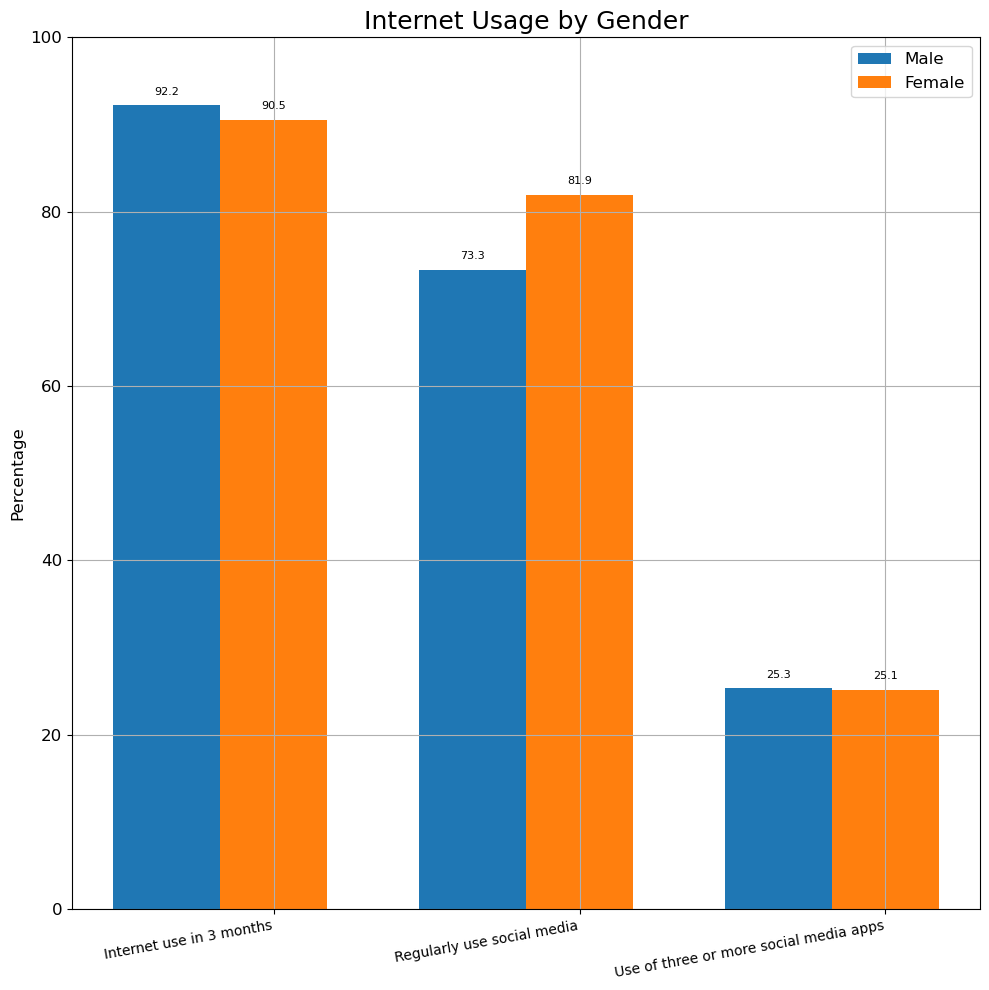

In [26]:
male_data = [92.2, 73.3, 25.3]
female_data = [90.5, 81.9, 25.1]


labels = ['Internet use in 3 months', 'Regularly use social media', 
          'Use of three or more social media apps']

plt.figure(figsize=(10, 10))
bar_width = 0.35
index = np.arange(len(labels))

plt.bar(index, male_data, bar_width, label='Male')
plt.bar(index + bar_width, female_data, bar_width, label='Female')

plt.xlabel('')
plt.ylabel('Percentage', fontsize=12)
plt.title('Internet Usage by Gender', fontsize=18)
plt.xticks(index + bar_width / 1, labels, rotation = 10, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.legend(fontsize=12)

for i, value in enumerate(male_data):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=8)  
for i, value in enumerate(female_data):
    plt.text(i + bar_width, value + 1, str(value), ha='center', va='bottom', fontsize=8) 

plt.tight_layout()
plt.grid(True)
plt.show()

Now I isolated the age range to see the data of internet usage for each age range. Again, I concentrated on internet usage and not the average apps or activities.

In [27]:
table_chart = tables[0]

df1 = pd.read_html(str(table_chart))[0]
df1 = df1.fillna('')

df1 = df1.iloc[:-1]

Age = df1.iloc[6:13, :]

Age

C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\681621500.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(table_chart))[0]


,0,1,2,3,4,5
6,15 to 19,99.6,92.2,53.3,2.6,3.5
7,20 to 24,97.7,95.9,50.7,2.5,3.4
8,25 to 29,99.1,92.8,35.8,2.2,3.6
9,30 to 34,98.7,91.1,24.6,1.9,3.6
10,35 to 49,97.3,83.7,19.0,1.8,3.3
11,50 to 64,92.9,68.3,14.5,1.6,3.0
12,65 or older,71.2,50.5,5.9,1.3,2.7


In [28]:
data = df1.iloc[6:13, 1:4].values.tolist()

for row in data:
    print(row)

['99.6', '92.2', '53.3']
['97.7', '95.9', '50.7']
['99.1', '92.8', '35.8']
['98.7', '91.1', '24.6']
['97.3', '83.7', '19.0']
['92.9', '68.3', '14.5']
['71.2', '50.5', '5.9']


We can see from the graph that internet usage is well used for the age groups from 15 to 49-year-olds. 

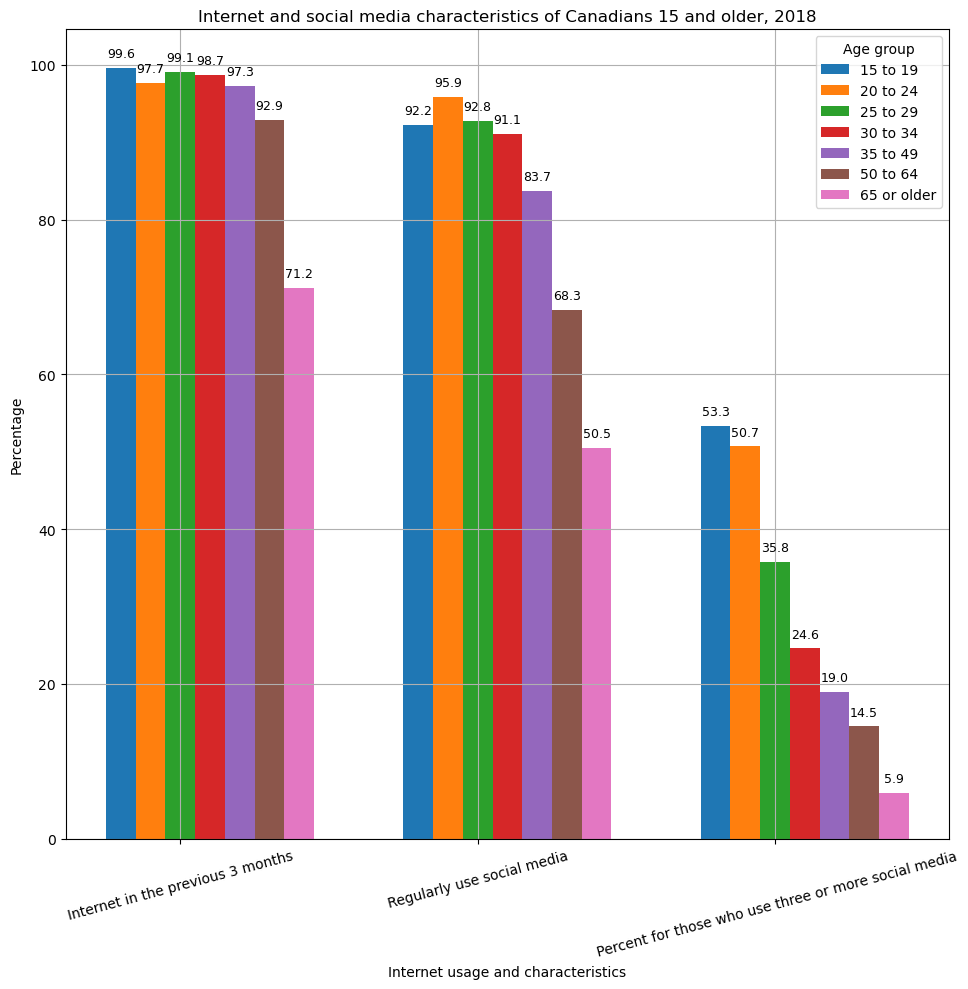

In [29]:
data = [['99.6', '92.2', '53.3'],
        ['97.7', '95.9', '50.7'],
        ['99.1', '92.8', '35.8'],
        ['98.7', '91.1', '24.6'],
        ['97.3', '83.7', '19.0'],
        ['92.9', '68.3', '14.5'],
        ['71.2', '50.5', '5.9']]

data = [[float(num) for num in row] for row in data]

labels = ['15 to 19','20 to 24', '25 to 29', '30 to 34', '35 to 49', '50 to 64', '65 or older']

x = np.arange(len(data[0]))

plt.figure(figsize=(10, 10))

for i, row in enumerate(data):
    plt.bar(x + i * 0.1, row, width=0.1, label=labels[i])
    for j, value in enumerate(row):
        plt.text(j + i * 0.1, value + 1, f'{value}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Internet usage and characteristics')
plt.ylabel('Percentage')
plt.title('Internet and social media characteristics of Canadians 15 and older, 2018')
plt.xticks(x + 0.2, ['Internet in the previous 3 months', 'Regularly use social media', 
                     ' Percent for those who use three or more social media'], rotation=15)
plt.legend(title='Age group')
plt.grid(True)
plt.tight_layout()

plt.show()

I web scraped the chart that shows the negative characteristics affecting the surveyed individuals.

In [65]:
soup = BeautifulSoup(r.content, "html.parser")
table4 = soup.find_all('table')

table_chart4 = tables[3]

df = pd.read_html(str(table_chart4))[0]
df = df.fillna('')

df = df.iloc[:-1]

df

C:\Users\kevca\AppData\Local\Temp\ipykernel_285104\4048155740.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table_chart4))[0]


,0,1,2,3,4,5,6
0,,Lost sleep,Had trouble concentrating,Had less physical activity,Felt anxious or depressed,Felt envious,Felt frustrated or angry
1,,percent,percent,percent,percent,percent,percent
2,Total,19.3,17.5,22.4,13.8,13.2,12.4
3,Sex,,,,,,
4,Male,19.1,15.5,20.2,11.7,9.4,11.5
5,Female,19.5,19.3,24.4,15.6,16.7,13.3
6,Age group (years),,,,,,
7,15 to 19,47.0,36.1,29.5,22.8,18.3,17.7
8,20 to 24,28.2,33.5,26.2,21.6,24.0,16.8
9,25 to 29,20.5,24.3,26.1,19.4,19.2,16.9


Here I separated the chart so I can compare the data between both sexes. 

In [31]:
data = df.iloc[4:6, 1:7].values.tolist()

for row in data:
    print(row)

['19.1', '15.5', '20.2', '11.7', '9.4', '11.5']
['19.5', '19.3', '24.4', '15.6', '16.7', '13.3']


The chart indicates that females experience more negative impacts from social media use. Sleep loss, difficulty concentrating, and reduced physical activity are the main negative attributes associated to social media use. 

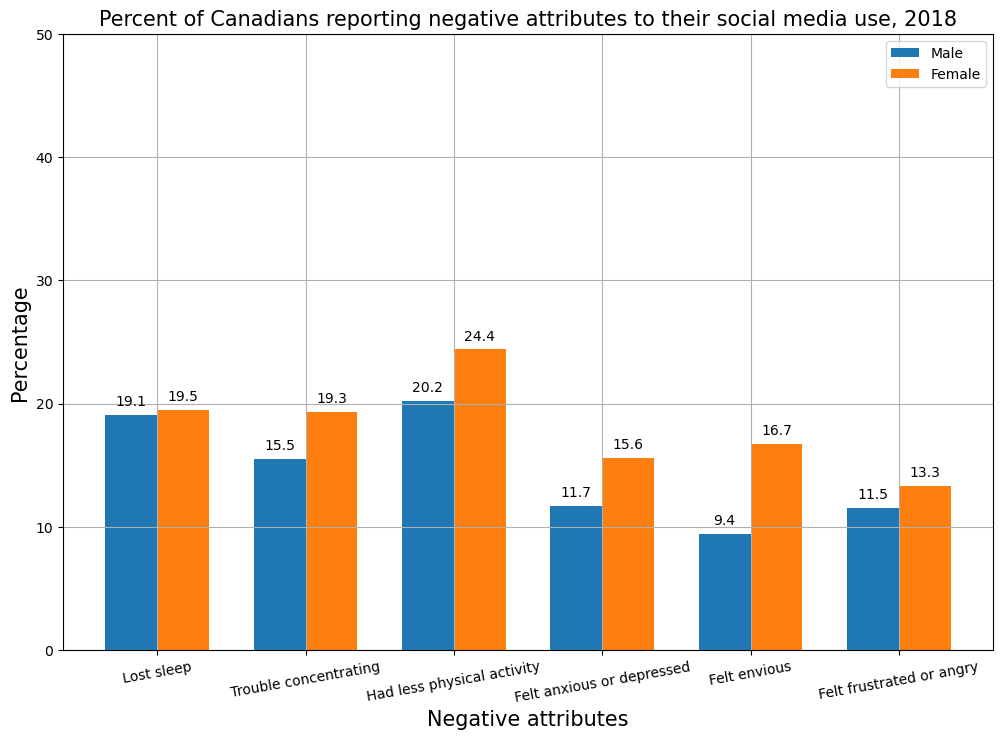

In [32]:
male_perc = ['19.1', '15.5', '20.2', '11.7', '9.4', '11.5']
female_perc = ['19.5', '19.3', '24.4', '15.6', '16.7', '13.3']

labels = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity', 
          'Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']

male_perc = [float(x) for x in male_perc]
female_perc = [float(x) for x in female_perc]

x = range(len(labels))
width = 0.35
plt.figure(figsize=(12, 8))

bars1 = plt.bar(x, male_perc, width, label='Male')
bars2 = plt.bar([i + width for i in x], female_perc, width, label='Female')

plt.xticks([i + width / 2 for i in x], labels, rotation=10)

plt.xlabel('Negative attributes', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Percent of Canadians reporting negative attributes to their social media use, 2018', 
          fontsize = 15)
plt.ylim(0, 50)
plt.grid(True)
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

I seperated the data so I can concentrate on the age range and which group are the most affected.

In [33]:
data2 = df.iloc[7:13, 1:7].values.tolist()

for row in data2:
    print(row)

['47.0', '36.1', '29.5', '22.8', '18.3', '17.7']
['28.2', '33.5', '26.2', '21.6', '24.0', '16.8']
['20.5', '24.3', '26.1', '19.4', '19.2', '16.9']
['20.3', '17.9', '25.6', '14.5', '18.7', '14.7']
['15.9', '12.5', '21.5', '11.6', '10.9', '11.7']
['7.3', '5.4', '15.7', '6.3', '3.8', '6.0']


The age groups most negatively affected by social media use are 15 to 19-year-olds and 20 to 24-year-olds. 47% of 15 to 19-year-olds report losing sleep due to social media use, and 36.1% have trouble concentrating. Compared to the second highest, 28.2% of 20 to 24-year-olds see that they lose sleep, and 33.5% of the same group see that they have trouble concentrating. 

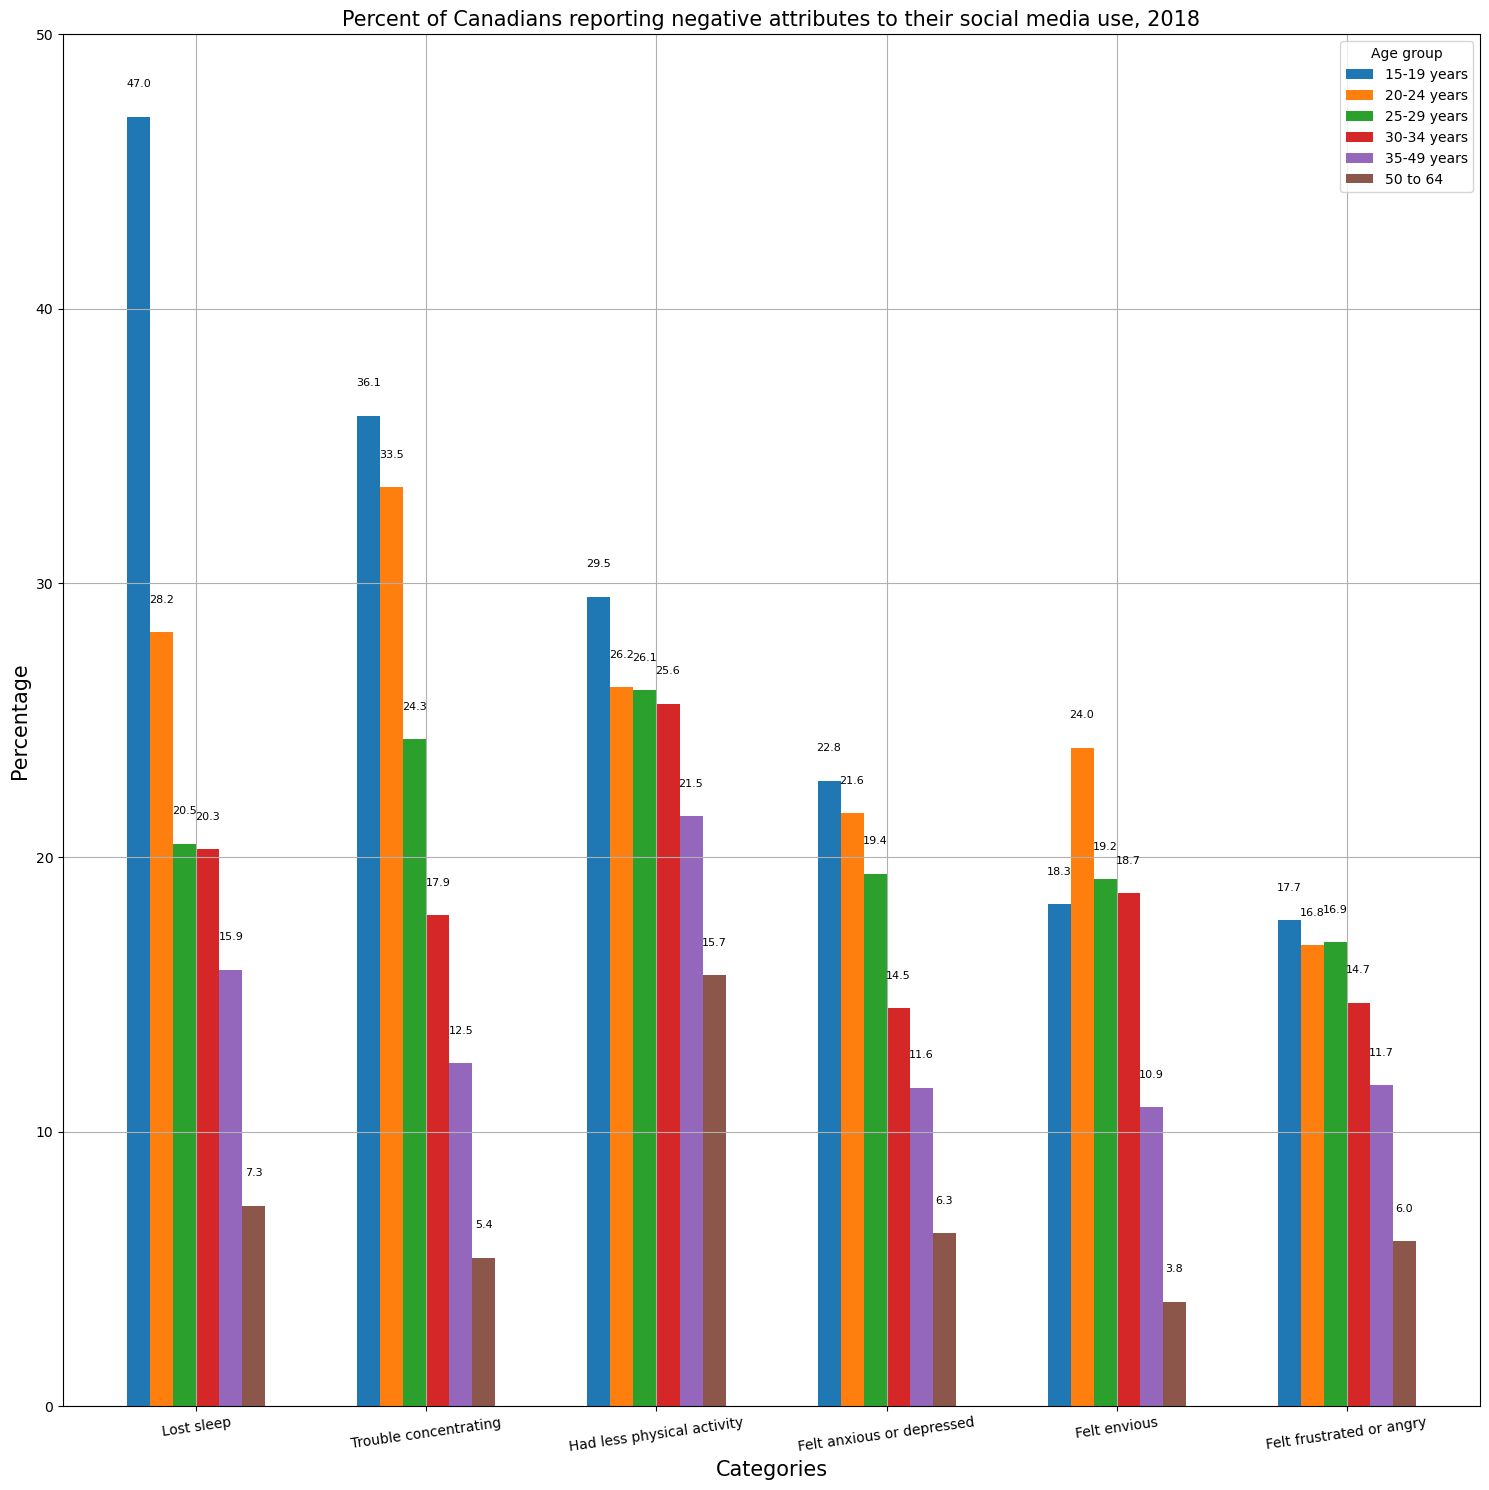

In [85]:
data2 = [['47.0', '36.1', '29.5', '22.8', '18.3', '17.7'],
        ['28.2', '33.5', '26.2', '21.6', '24.0', '16.8'],
        ['20.5', '24.3', '26.1', '19.4', '19.2', '16.9'],
        ['20.3', '17.9', '25.6', '14.5', '18.7', '14.7'],
        ['15.9', '12.5', '21.5', '11.6', '10.9', '11.7'],
        ['7.3', '5.4', '15.7', '6.3', '3.8', '6.0']]

data2 = [[float(num) for num in row] for row in data2]

categories = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity','Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']
age_groups = ['15-19 years', '20-24 years', '25-29 years', '30-34 years', '35-49 years', '50 to 64']

x = np.arange(len(categories))
width = 0.1

plt.figure(figsize=(15, 15))

for i, row in enumerate(data2):
    plt.bar(x + i * width, row, width=width, label=age_groups[i])
    for j, value in enumerate(row):
        plt.text(x[j] + i * width, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Categories', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Percent of Canadians reporting negative attributes to their social media use, 2018', fontsize=15)
plt.xticks(x + (width * len(data2) / 2) - width / 2, categories, rotation=8)

plt.legend(title='Age group')
plt.grid(True)
plt.ylim(0, 50)

plt.tight_layout()

plt.show()


The following chart contains a comparative analysis of negative attributes and their associated age ranges. The heat map illustrates that loss of sleep is the primary negative effect experienced by all age groups as a result of social media usage. Among all age ranges, individuals aged 25 to 29 consistently exhibit negative effects due to social media, averaging between 26 to 15% on all categories. 

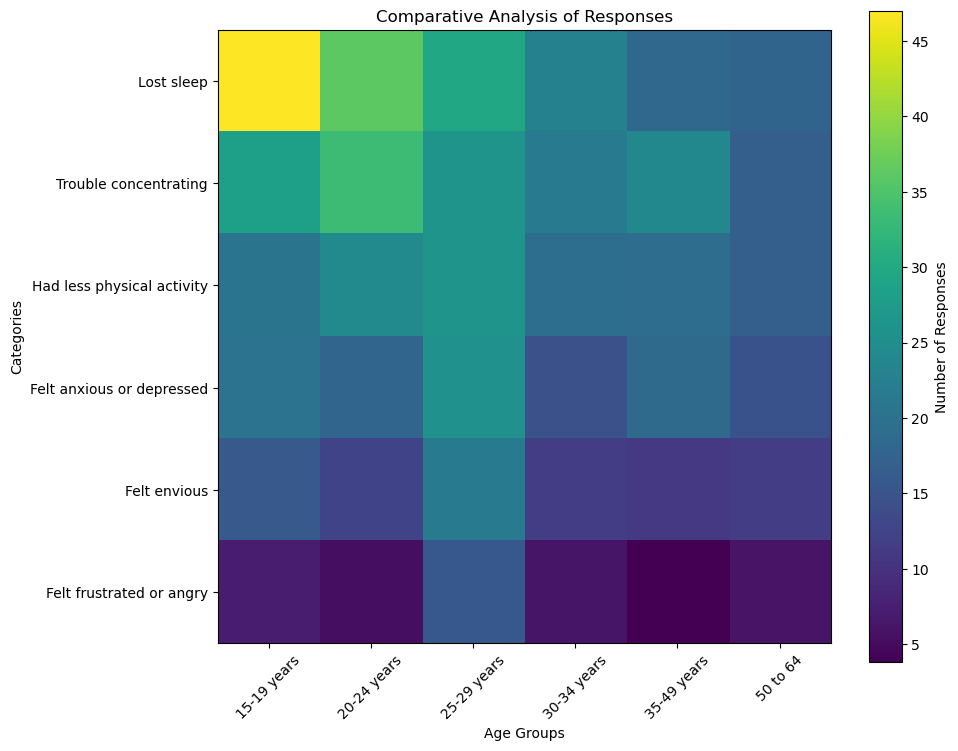

In [86]:
data2 = np.array([[47.0, 36.1, 29.5, 22.8, 18.3, 17.7],
                  [28.2, 33.5, 26.2, 21.6, 24.0, 16.8],
                  [20.5, 24.3, 26.1, 19.4, 19.2, 16.9],
                  [20.3, 17.9, 25.6, 14.5, 18.7, 14.7],
                  [15.9, 12.5, 21.5, 11.6, 10.9, 11.7],
                  [7.3, 5.4, 15.7, 6.3, 3.8, 6.0]])

categories = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity',
              'Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']

age_groups = ['15-19 years', '20-24 years', '25-29 years', '30-34 years', '35-49 years', '50 to 64']

plt.figure(figsize=(10, 8))
plt.imshow(data2, cmap='viridis', interpolation='nearest')

plt.title('Comparative Analysis of Responses')
plt.xlabel('Age Groups')
plt.ylabel('Negative Categories')
plt.xticks(np.arange(len(age_groups)), age_groups, rotation=45)
plt.yticks(np.arange(len(categories)), categories)
plt.colorbar(label='Number of Responses')

plt.tight_layout()
plt.show()

I compared the data by dividing it into groups based on the number of social media accounts to see the same effects it would have on them.

In [36]:
data3 = df.iloc[14:17, 1:7].values.tolist()

for row in data3:
    print(row)

['10.8', '9.0', '16.6', '7.7', '6.9', '7.3']
['19.5', '17.4', '23.7', '13.8', '13.9', '12.9']
['31.7', '30.2', '29.5', '22.7', '21.8', '19.5']


Data indicates that individuals with three or more social media accounts experience up to three times as many negative characteristics compared to those with a single social media account.

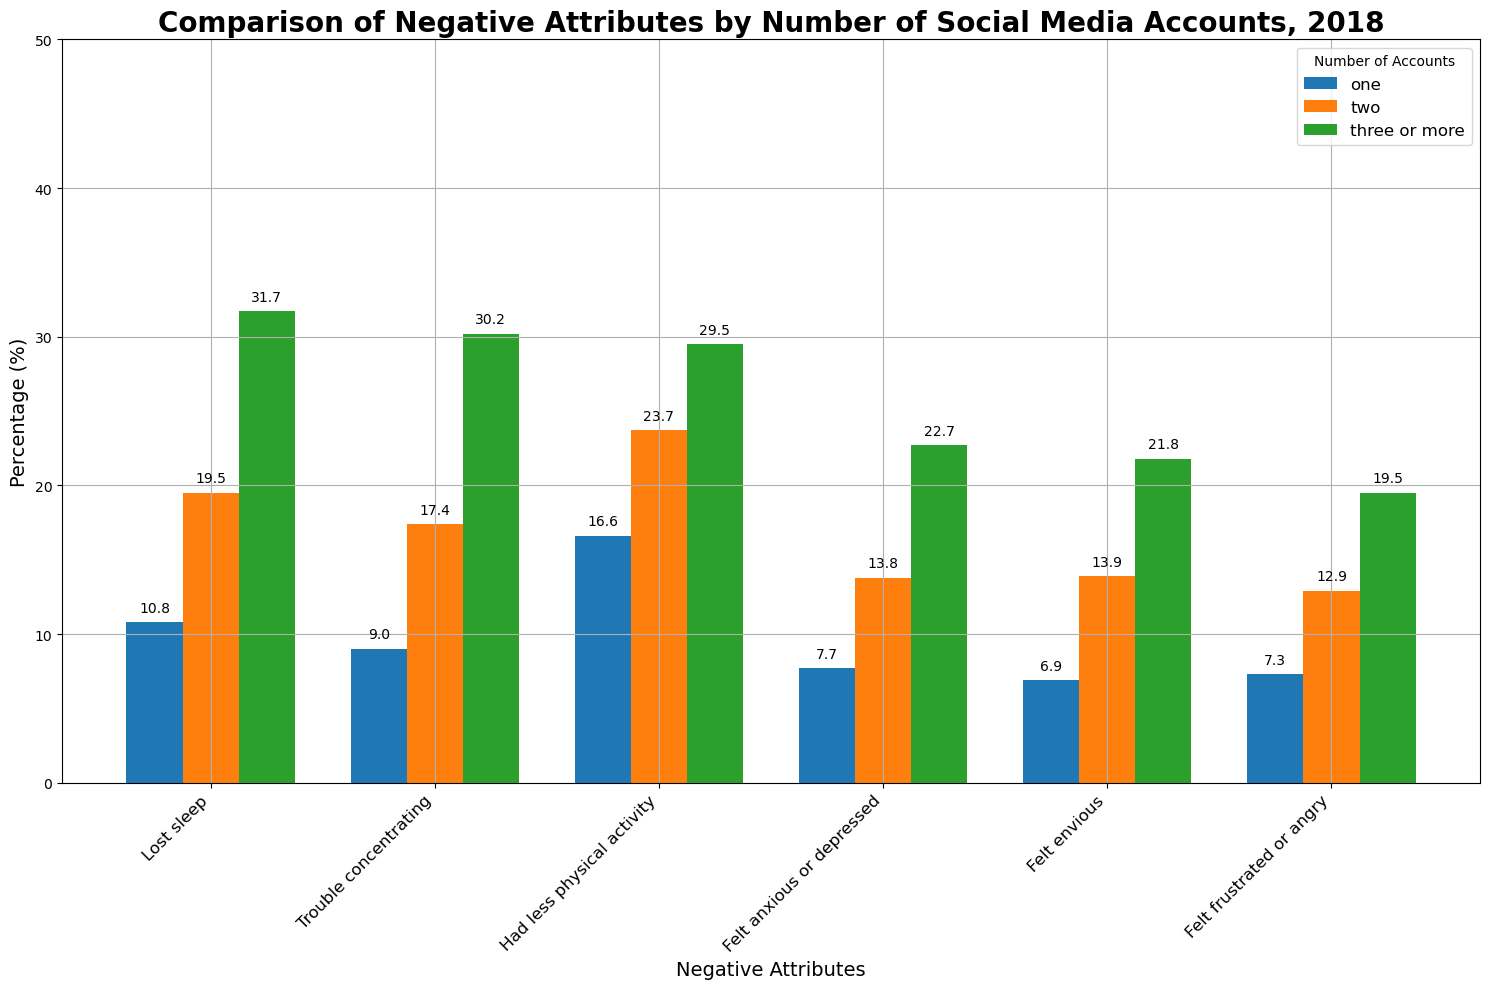

In [59]:
data3 = np.array([[10.8, 19.5, 31.7],  
    [9.0, 17.4, 30.2],   
    [16.6, 23.7, 29.5],  
    [7.7, 13.8, 22.7],   
    [6.9, 13.9, 21.8],   
    [7.3, 12.9, 19.5]])

categories = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity', 
              'Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']

media_accounts = ['one', 'two', 'three or more']

num_categories = len(categories)

ind = np.arange(num_categories)  
bar_width = 0.25  

plt.figure(figsize=(15, 10))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i in range(len(media_accounts)):
    plt.bar(ind + i * bar_width, data3[:, i], bar_width, label=media_accounts[i], color=colors[i])

plt.xlabel('Negative Attributes', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Comparison of Negative Attributes by Number of Social Media Accounts, 2018', 
          fontsize=20, fontweight='bold')

plt.xticks(ind + bar_width, categories, rotation=45, ha='right', fontsize=12)
plt.legend(title='Number of Accounts', fontsize=12)
plt.grid(True)

for i in range(len(categories)):
    for j in range(len(media_accounts)):
        value = data3[i, j]
        plt.text(ind[i] + j * bar_width, value + 0.5, f'{value:.1f}', ha='center', 
                 va='bottom', fontsize=10)

plt.tight_layout()
plt.ylim(0, 50)

plt.show()

The heat map also indicates a significant increase in negative characteristics for individuals with multiple social media accounts compared to those with a single account. 

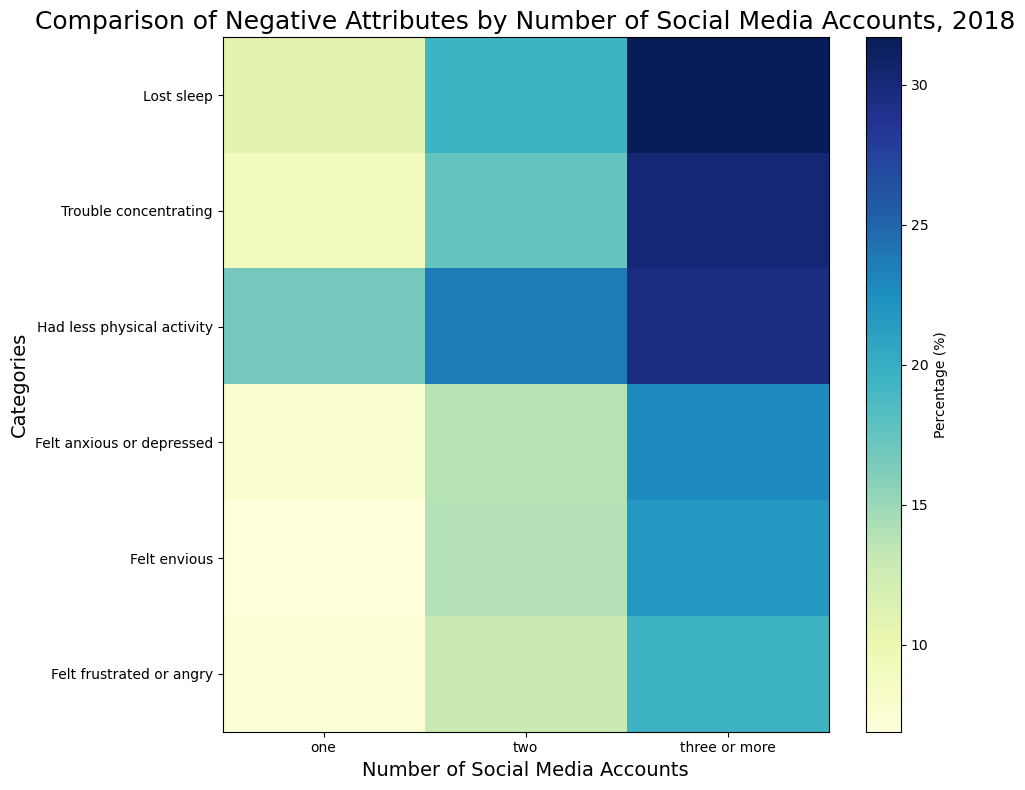

In [87]:
data3 = np.array([[10.8, 19.5, 31.7],  
    [9.0, 17.4, 30.2],   
    [16.6, 23.7, 29.5],  
    [7.7, 13.8, 22.7],   
    [6.9, 13.9, 21.8],   
    [7.3, 12.9, 19.5]])

categories = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity',
              'Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']
media_accounts = ['one', 'two', 'three or more']

plt.figure(figsize=(10, 8))
plt.imshow(data3, cmap='YlGnBu', interpolation='nearest', aspect='auto')

plt.title('Comparison of Negative Attributes by Number of Social Media Accounts, 2018', fontsize=18)
plt.xlabel('Number of Social Media Accounts', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.xticks(np.arange(len(media_accounts)), media_accounts)
plt.yticks(np.arange(len(categories)), categories)

plt.colorbar(label='Percentage (%)')

plt.tight_layout()
plt.show()

Finally, I conducted a data analysis to compare usage of phones and its correlation with negative characteristics.

In [39]:
data4 = df.iloc[18:20, 1:7].values.tolist()

for row in data4:
    print(row)

['13.3', '11.1', '17.2', '10.5', '9.2', '9.4']
['30.1', '29.0', '31.8', '19.7', '20.5', '17.8']


Individuals who use their phones more frequently tend to exhibit more negative characteristics. However, for those who reported using their phones less frequently, they did score lower, but the difference is not significant enough to conclude that phone usage is the cause. The variance is only 3 to 5% less than those who use their phones more.

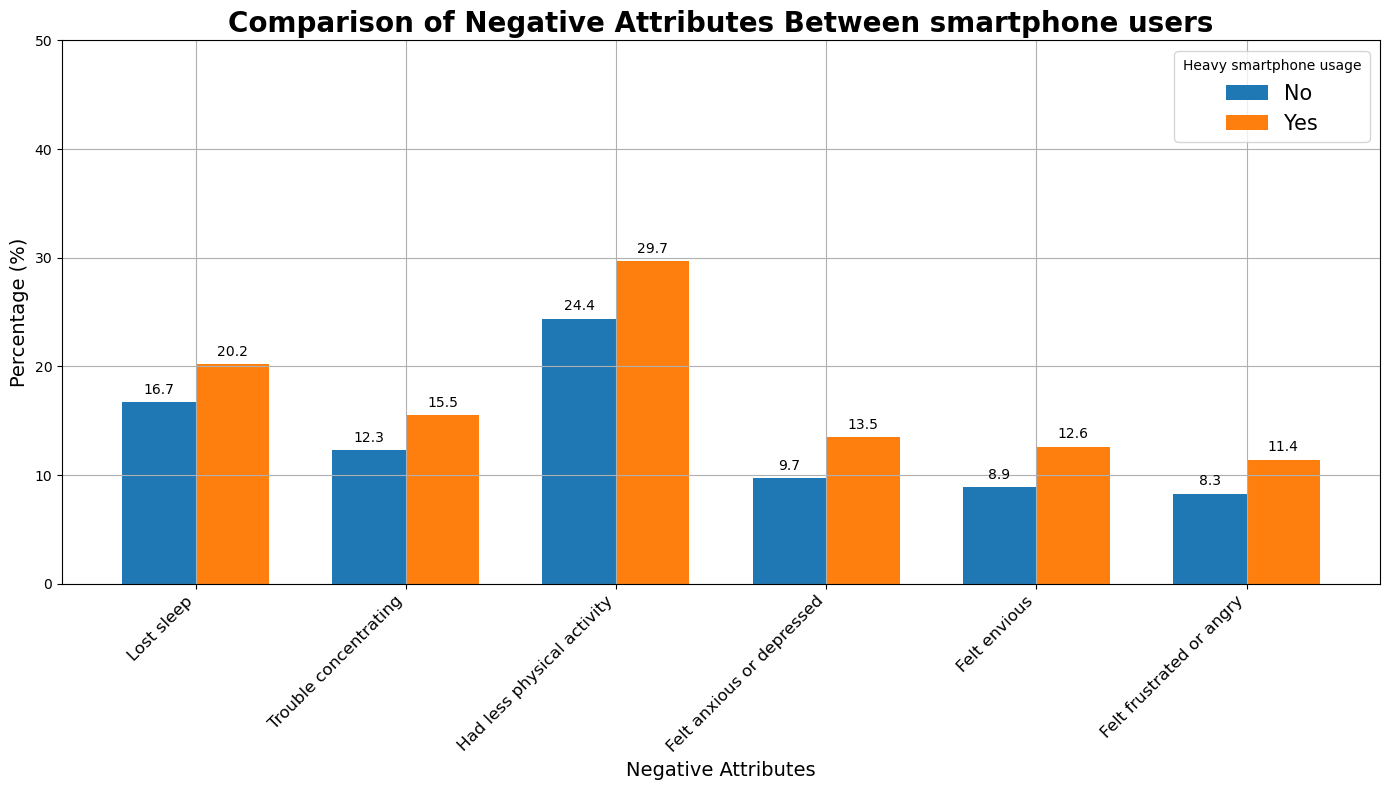

In [88]:
data4 = [[16.7, 12.3, 24.4, 9.7, 8.9, 8.3], 
        [20.2, 15.5, 29.7, 13.5, 12.6, 11.4]]

categories = ['Lost sleep', 'Trouble concentrating', 'Had less physical activity', 
              'Felt anxious or depressed', 'Felt envious', 'Felt frustrated or angry']

conditions = ['No', 'Yes']

data4 = np.array(data4)

num_categories = len(categories)

ind = np.arange(num_categories) 
bar_width = 0.35  

plt.figure(figsize=(14, 8))

for i in range(len(conditions)):
    plt.bar(ind + i * bar_width, data4[i], bar_width, label=conditions[i])

plt.xlabel('Negative Attributes', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Comparison of Negative Attributes Between smartphone users', 
          fontsize=20, fontweight='bold')
plt.xticks(ind + bar_width / 2, categories, rotation=45, ha='right', fontsize=12)
plt.legend(title='Heavy smartphone usage', fontsize=15)
plt.grid(True)

for i in range(len(categories)):
    for j in range(len(conditions)):
        value = data4[j, i]
        plt.text(ind[i] + j * bar_width, value + 0.5, f'{value:.1f}', ha='center', va='bottom', 
                 fontsize=10)

plt.tight_layout()
plt.ylim(0, 50)

plt.show()

# Final analysis

The data presented in both articles shows heavy usage of the internet and social media. Whether it's for social media, general internet use, or online video games, the 2020 survey revealed that over 50% of the surveyed population uses these platforms for less than 10 hours per week on average.

The general consensus among those surveyed is that they have good mental health. However, individuals who use social media or smartphones less frequently generally report better mental health compared to those who use them more. Those who reported fair or poor mental health spend an average of 19% more time on their phones compared to those who spend less time per day (12%).

The survey also found that women use social media more than men, with 81.9% of women surveyed reporting higher usage compared to 73.3% of men. Additionally, females attributed more negative characteristics to social media use.

Age is also a factor, with the age groups of 15 to 19-year-olds and 20 to 24-year-olds showing higher usage of the internet and social media, as well as a higher prevalence of negative characteristics associated with social media use. Loss of sleep, trouble concentrating, and less physical activity are among the highest negative characteristics for all age groups.

# Conclusion

According to the data presented, the increase in online presence and consumption, especially among adolescents, has led to both positive and negative effects. While online platforms provide connectivity and access to information, heavy usage, particularly of social media and smartphones, is associated with poorer mental health outcomes. Factors such as decreased sleep, trouble concentrating, and reduced physical activity are common among younger age groups, suggesting potential adverse impacts on mental well-being. Additionally, the higher use of social media among females and younger age groups highlights the need for targeted interventions to promote healthier digital habits and mitigate negative consequences on adolescent mental health